In [5]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
from datetime import timedelta

# visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

%matplotlib inline

# configure visualizations
sns.set_style('whitegrid')
figsize=(8,6)

In [10]:
def load_df(path, columns=None, use_threads=True):
    try:
        return pq.read_table(path, columns=columns, use_threads=use_threads).to_pandas()
    except Exception as e:
        print(e)

def downcast_ints(df):
    # downcast int types
    df_int = df.select_dtypes(include=['int'])
    converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')
    df[converted_int.columns] = converted_int
    
    return df
        
def prepare(path,cols):

    df = load_df(path,cols)
    df = df.reset_index(drop=True)
    df = downcast_ints(df)
    
    return df

In [7]:
def pieOthers(dfVars,dfVals,threshold):
    df = pd.DataFrame(
        data = {'var': dfVars, 'value' : dfVals},
        ).sort_values('value', ascending = False)
    
    if threshold > 0 :
        df2 = df[:threshold].copy()
        new_row = pd.DataFrame(data = {
            'var' : ['Others'],
            'value' : [dfVals[threshold:].sum()]
        })

        df2 = pd.concat([df2, new_row])
    else:
        df2 = df
        
    percent = 100.*df2['value']/df2['value'].sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df2['var'], percent)]
    #labels = ['{0} - {1}'.format(i,j) for i,j in zip(df2['var'], df2['value'])]
    
    colorsX = plt.cm.tab20.colors
    patches, texts = plt.pie(df2['value'], shadow=True, startangle=90, colors = colorsX)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


In [18]:
cols = ['network_status', 'screen_brightness', 'screen_on', 'timezone', 'country_code']
df = prepare('1-parquet-files/samplesPeriods.parquet',cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11503813 entries, 0 to 11503812
Data columns (total 5 columns):
network_status       object
screen_brightness    int64
screen_on            int32
timezone             object
country_code         object
dtypes: int32(1), int64(1), object(3)
memory usage: 395.0+ MB


In [19]:
df.head(100)

,network_status,screen_brightness,screen_on,timezone,country_code
0,LTE,-1,1,AMERICA/CHICAGO,us
1,LTE,-1,1,AMERICA/CHICAGO,us
2,LTE,-1,1,AMERICA/CHICAGO,us
3,LTE,-1,1,AMERICA/CHICAGO,us
4,LTE,-1,1,AMERICA/CHICAGO,us
5,LTE,-1,1,AMERICA/CHICAGO,us
6,LTE,-1,1,AMERICA/CHICAGO,us
7,LTE,-1,1,AMERICA/CHICAGO,us
8,LTE,-1,1,AMERICA/CHICAGO,us
9,LTE,-1,1,AMERICA/CHICAGO,us


In [30]:
dfNetworkStatusGB = df.groupby(['network_status'])['network_status'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfScreenOnGB = df.groupby(['screen_on'])['screen_on'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfTimezoneGB = df.groupby(['timezone'])['timezone'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfCountryGB = df.groupby(['country_code'])['country_code'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

dfScreenOnGB['screen_on'] = dfScreenOnGB['screen_on'].apply(lambda x: "No" if x == 0 else "Yes")


In [31]:
print("Samples:"+str(len(df.index)))

Samples:11503813


   network_status    count
21           WIFI  5730970
9    DISCONNECTED  3556265
19            LTE  1167003
17          HSPAP   479035
16           HSPA   148033
0               0   134797
20           UTMS   134642
11           EDGE    71263
10  DISCONNECTING    26688
15          HSDPA    19957
18          HSUPA    18505
13         EVDO_A     7045
14           GPRS     5948
4              19     1592
5           1XRTT      909
12          EHRPD      659
8      CONNECTING      227
7              30      155
6              20       82
1              16       20


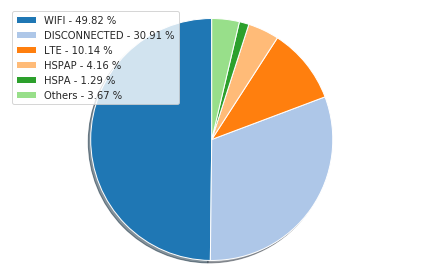

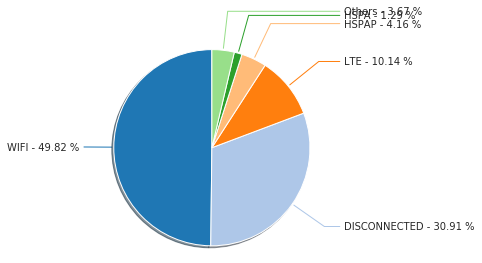

In [32]:
print(dfNetworkStatusGB)

pieOthers(dfNetworkStatusGB['network_status'], dfNetworkStatusGB['count'],5)


  screen_on    count
0        No  6293204
1       Yes  5210609


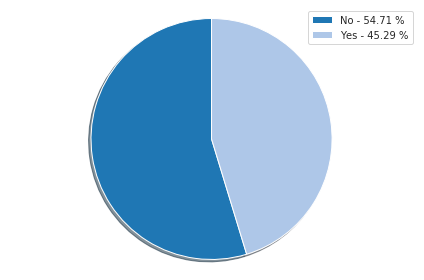

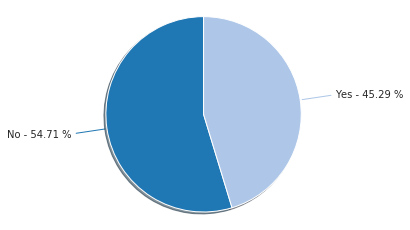

In [33]:
print(dfScreenOnGB)

pieOthers(dfScreenOnGB['screen_on'], dfScreenOnGB['count'],0)


                           timezone    count
203                   EUROPE/LISBON  2232806
177                ATLANTIC/MADEIRA  1760232
134                    ASIA/JAKARTA   705298
89                 AMERICA/NEW_YORK   461066
103               AMERICA/SAO_PAULO   459117
83              AMERICA/MEXICO_CITY   391264
56                  AMERICA/CHICAGO   390433
121                    ASIA/BANGKOK   339331
205                   EUROPE/LONDON   307547
139                    ASIA/KARACHI   280379
125                   ASIA/CALCUTTA   270206
47                    AMERICA/BELEM   199083
151                     ASIA/MANILA   180159
41   AMERICA/ARGENTINA/BUENOS_AIRES   179693
207                   EUROPE/MADRID   152508
99                   AMERICA/RECIFE   148387
213                    EUROPE/PARIS   142872
77                     AMERICA/LIMA   135050
78              AMERICA/LOS_ANGELES   131457
49                   AMERICA/BOGOTA   100454


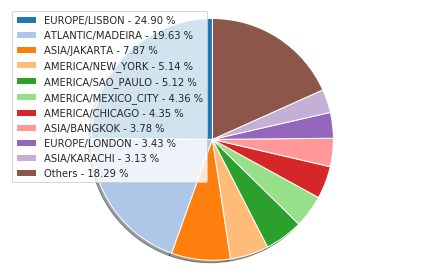

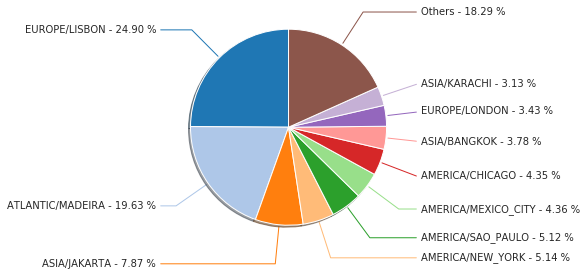

In [28]:
print(dfTimezoneGB)

pieOthers(dfTimezoneGB['timezone'], dfTimezoneGB['count'],10)


    country_code    count
118           pt  4121026
148           us   882040
18            br   871285
147      unknown   793058
66            id   763409
101           mx   400510
69            in   344902
137           th   336014
116           pk   272747
115           ph   165564
5             ar   160855
44            es   158747
114           pe   131974
47            fr   118054
124           ru   100465
31            co    91262
73            it    84156
36            de    81532
49            gb    81504
39            dz    75659


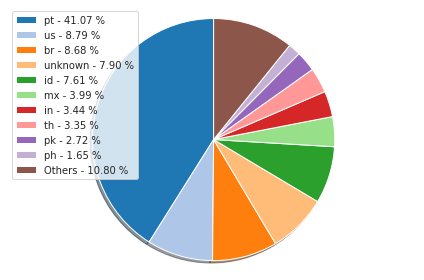

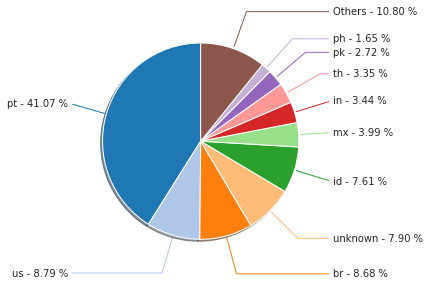

In [34]:
print(dfCountryGB)

pieOthers(dfCountryGB['country_code'], dfCountryGB['count'],10)
